In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv("American_Express_User_Exit_Prediction.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X)

[[553 'Delhi' 'Female' ... 4 1 274150]
 [447 'Bengaluru' 'Male' ... 4 1 519360]
 [501 'Delhi' 'Female' ... 4 1 545501]
 ...
 [627 'Mumbai' 'Female' ... 4 0 494067]
 [600 'Bengaluru' 'Female' ... 2 1 109375]
 [553 'Delhi' 'Male' ... 4 1 180031]]


In [9]:
print(y)

[0 0 0 ... 0 1 0]


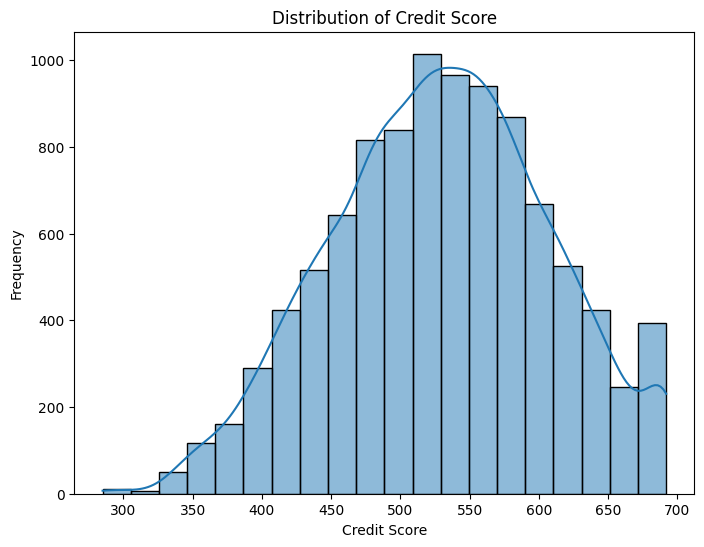

In [38]:
# Histogram for 'CreditScore'
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Credit Score'], bins=20, kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

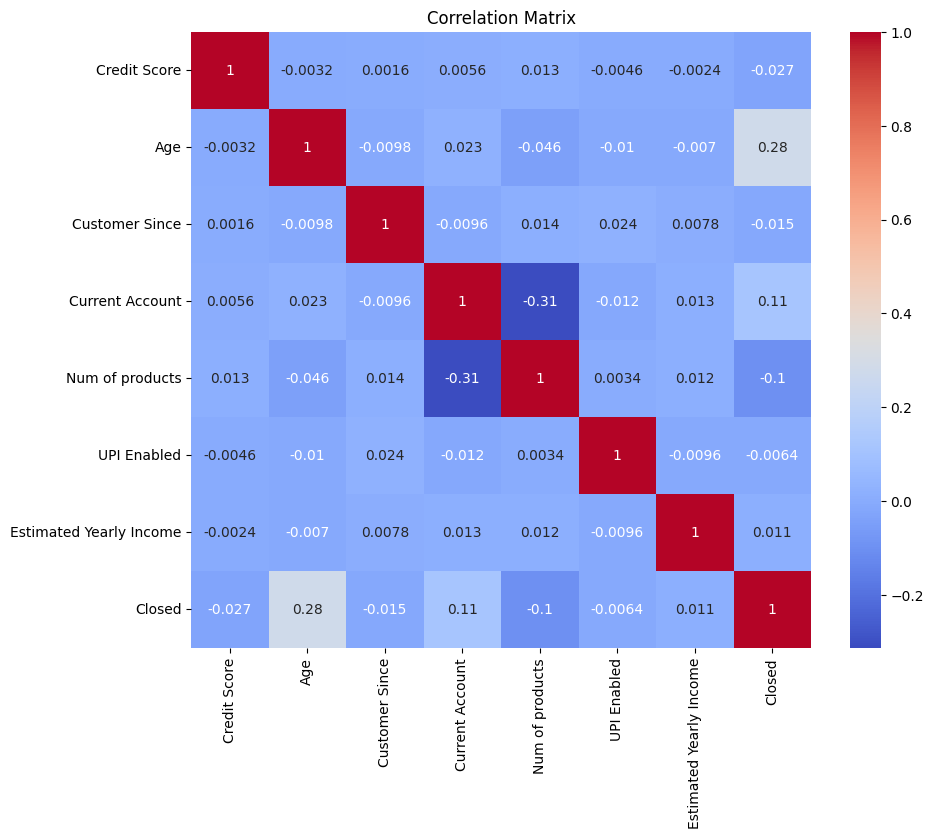

In [49]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))

numeric_data = dataset.select_dtypes(include=np.number)

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [12]:
print(X)

[[553 'Delhi' 0 ... 4 1 274150]
 [447 'Bengaluru' 1 ... 4 1 519360]
 [501 'Delhi' 0 ... 4 1 545501]
 ...
 [627 'Mumbai' 0 ... 4 0 494067]
 [600 'Bengaluru' 0 ... 2 1 109375]
 [553 'Delhi' 1 ... 4 1 180031]]


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
print(X)

[[0.0 1.0 0.0 ... 4 1 274150]
 [1.0 0.0 0.0 ... 4 1 519360]
 [0.0 1.0 0.0 ... 4 1 545501]
 ...
 [0.0 0.0 1.0 ... 4 0 494067]
 [1.0 0.0 0.0 ... 2 1 109375]
 [0.0 1.0 0.0 ... 4 1 180031]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

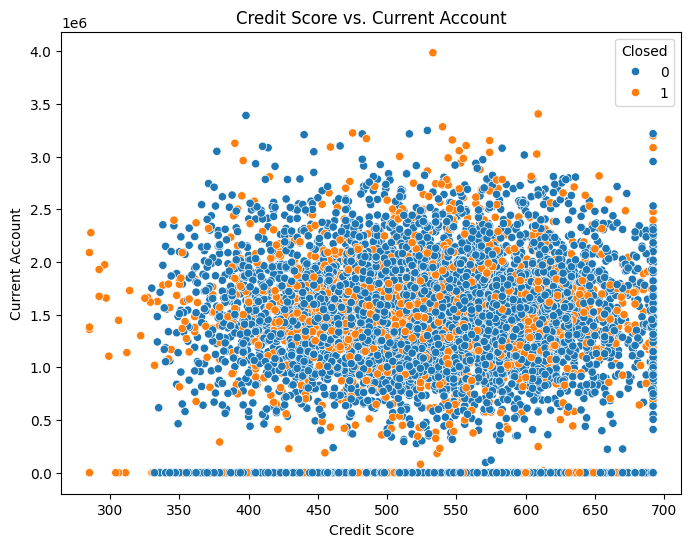

In [46]:
# Scatter plot for 'Credit Score' vs 'Current Account'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit Score', y='Current Account', data=dataset, hue='Closed')
plt.title('Credit Score vs. Current Account')
plt.xlabel('Credit Score')
plt.ylabel('Current Account')
plt.show()

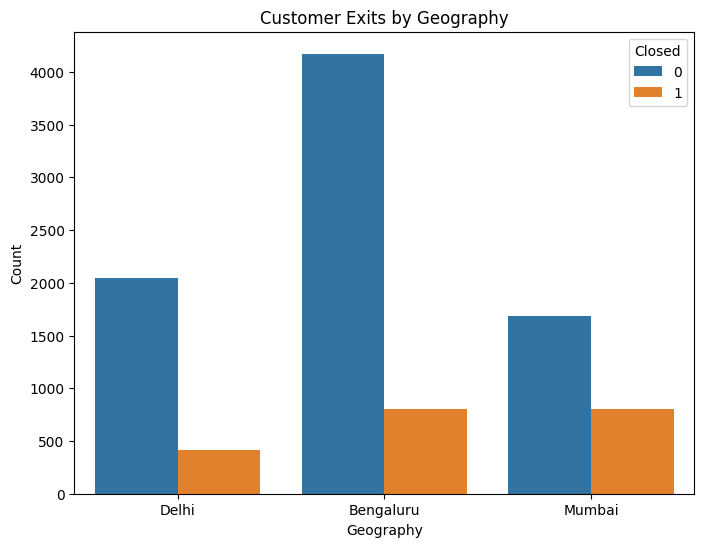

In [45]:
# Count plot for 'Geography'
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=dataset, hue='Closed')
plt.title('Customer Exits by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 0.99434917 -0.57109746 -0.5792406  ...  0.90580857  0.65086753
  -0.06854301]
 [-1.00568294 -0.57109746  1.72639831 ...  0.90580857  0.65086753
   0.34018176]
 [ 0.99434917 -0.57109746 -0.5792406  ... -0.951175   -1.53641095
  -0.67326188]
 ...
 [-1.00568294 -0.57109746  1.72639831 ... -0.951175    0.65086753
  -0.17067658]
 [-1.00568294 -0.57109746  1.72639831 ... -0.951175    0.65086753
   1.4232319 ]
 [ 0.99434917 -0.57109746 -0.5792406  ... -0.951175   -1.53641095
  -1.67963883]]


In [19]:
print(X_test)

[[-1.00568294 -0.57109746  1.72639831 ... -0.951175    0.65086753
   1.44738434]
 [-1.00568294 -0.57109746  1.72639831 ...  0.90580857  0.65086753
  -1.23191715]
 [ 0.99434917 -0.57109746 -0.5792406  ...  0.90580857  0.65086753
  -1.72970878]
 ...
 [ 0.99434917 -0.57109746 -0.5792406  ...  0.90580857 -1.53641095
   0.12692412]
 [ 0.99434917 -0.57109746 -0.5792406  ... -0.951175   -1.53641095
  -0.59717281]
 [ 0.99434917 -0.57109746 -0.5792406  ... -0.951175    0.65086753
   1.67285788]]


In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [29]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
ann.fit(X_train, y_train, batch_size=32, epochs=120)

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5596 - loss: 0.6799
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7798 - loss: 0.5131
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7949 - loss: 0.4790
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8032 - loss: 0.4456
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7978 - loss: 0.4473
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7977 - loss: 0.4403
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8030 - loss: 0.4319
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7961 - loss: 0.4389
Epoch 9/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4345
Epoch 10/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4159
Epoch 11/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4200
Epoch 12/120
249/249 ━━━━━━━━━━━━━━━━━━━━

In [31]:
print(ann.predict(sc.transform([[0.0, 1.0, 0.0, 501, 0, 32, 2, 0.0, 4, 1, 545501]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[False]]


In [34]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 1]]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1511   62]
 [ 230  183]]


0.8529707955689829